<a href="https://colab.research.google.com/github/uyenvybuile1502/ANN_hw/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam


x = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(x, y, epochs=10000, batch_size=15)
loss, acc = model.evaluate(x, y, verbose=0)
print(f'Accuracy: {acc * 100:.2f}%')

Epoch 1/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.6973
Epoch 2/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.5000 - loss: 0.6880
Epoch 3/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.6788
Epoch 4/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7500 - loss: 0.6703
Epoch 5/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7500 - loss: 0.6627
Epoch 6/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7500 - loss: 0.6557
Epoch 7/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.6487
Epoch 8/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.6418
Epoch 9/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.6354
Epoch 10/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.6293
Epoch 11/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.6235
Epoch 12/10000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step -

KeyboardInterrupt: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 621ms/step
Số dự đoán là: 404 (Độ tin cậy: 49.56%)


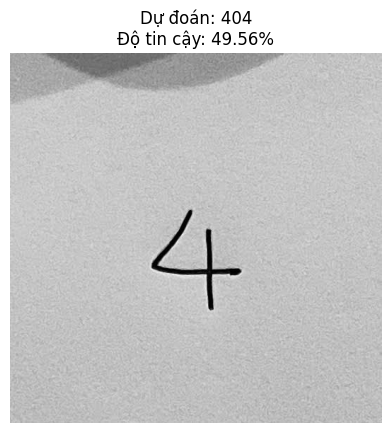

In [20]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.save('mnist_digit_model.h5')

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model('mnist_digit_model.h5')

def preprocess_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28, 1)
    return img

img_path = '/content/4.jpeg'
processed_img = preprocess_image(img_path)

prediction = model.predict(processed_img)
predicted_class = np.argmax(prediction)
confidence = np.max(prediction) * 100

print(f'Số dự đoán là: {predicted_class} (Độ tin cậy: {confidence:.2f}%)')

original_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(original_img, cmap='gray')
plt.title(f'Dự đoán: {predicted_class}\nĐộ tin cậy: {confidence:.2f}%')
plt.axis('off')
plt.show()

